# Use Case Summary

## Objective Statement
- Get business insight about how growth visitors and buyers in a month at Supermarket
- Get business insight about each visitors based on label defined such as Wandering Customer, Need-Based Customer and Loyal Customers at Supermarket
- Create modeling using Simple Linear Regression
- Deployment machine learning using MLflow

# Challenges
- It is not known what time and what day this Supermarket operates


## Methodology
- Descriptive Analysis
- Graph Analysis
- Machine learning Simple Linear Regression
- Deployment MLflow

## Business Benefit
- Know how to treat visitors based on their behavior when buy products in Supermarket
- Help the business team provide products or services based on the behavior of each customer

## Expected Outcome
- Know how growth visitors and buyers in a month at Supermarket
- Know each visitors based on label defined such as Wandering Customer, Need-Based Customer and Loyal Customers at Supermarket
- Know how create machine learning model using Linear Regression
- Know how to deploy machine learning using MLflow

# Business Understanding
Supermarket is a place that sells a variety of goods, such as food, drinks to household goods. Every day there are always visitors who come to buy or maybe just look around product that Supermarket display. So from here we get questions about visitors as follows:
- How growth visitors and buyers in a month at Supermarket ?
- How each vistors based on label defined such as Wandering Customer, Need-Based Customer and Loyal Customers at Supermarket ?
- How create machine learning using Linear Regression ?
- How deploy machine learning using MLflow ?

# Data Understanding

## Source Data
The dataset has 2 columns and 30 rows, contains daily total visitors and buyers for a month. We get dataset from this site https://www.kaggle.com/datasets/reyanmatrika/supermarket-visitor-linear-regression

## Data Dictionary
- Visitor : the number of people who visit the supermarket
- Buyer : the number of person who buys something in a supermarket

# Data Preparation
- Programming Language : Python Version 3.9.12
- Library : pandas, numpy, matplotlib, seaborn, statistics, sklearn, warning, urlparse, mflow, logging, os, sys

# Data Profiling

## Import library

We use some libraries from python needed to create machine learning simple linear regression

In [1]:
# pip install mlflow

In [2]:
import os
import warnings
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

load the dataset that we use and save in df variable

In [3]:
df = pd.read_csv('supermarket_visitor.csv')

Display the top 5 rows of the dataset

In [4]:
df.head()

,Visitor,Buyer
0,34,32
1,38,36
2,34,31
3,40,38
4,30,29


The table above displays the top 5 rows of the supermarket dataset

Display total rows and data type each columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Visitor  30 non-null     int64
 1   Buyer    30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


The supermarket_visitor dataset store **2 columns** with **30 rows** of data. Where is a **visitor column** store data about the total visitors and a **buyer column** store data about the total buyers in a supermarket.

# Data Cleaning

**No need to cleaning dataset** because the data types of both two columns are correct and there are no missing value in rows

# Exploratory Data Analysis

Display statistics descriptive dataset

In [6]:

    df.describe().T


,count,mean,std,min,25%,50%,75%,max
Visitor,30.0,35.2,3.763711,29.0,32.00,35.0,38.0,42.0
Buyer,30.0,33.4,2.647054,29.0,31.25,33.0,36.0,38.0


We assumed within 30 days, the **average visitors** in a supermarket **up to 35 visitors per day**. When the supermarket **not crowded**, there are only about **29 people per day**. But when the **supermarket is crowded**, visitors can reach **up to 42 visitors per day**.
Meanwhile the average of visitors who **make purchases up to 33 visitors**. When supermarket is **crowded, up to 38 people make purchases**. And only **29 visitors** make purchases when supermarket **not crowded**. 

Calculate total visitors, total buyers and percentage of buyers from all total visitors

In [7]:
total_visitor = df['Visitor'].sum()
total_buyer = df['Buyer'].sum()
percentage = round((total_buyer/total_visitor)*100,2)

print('Total Visitor : ', total_visitor)
print('Total Buyer : ', total_buyer)
print('Percentage : ',percentage)

Total Visitor :  1056
Total Buyer :  1002
Percentage :  94.89


We assumed within 30 days, **94.89% visitors make purchases** in supermarket. Whereas total visitors in supermarket up to 1056 visitors and total visitors make purchases up to 1002 visitors. 

We create a distribution plot to see the distribution of data in the Visitor column

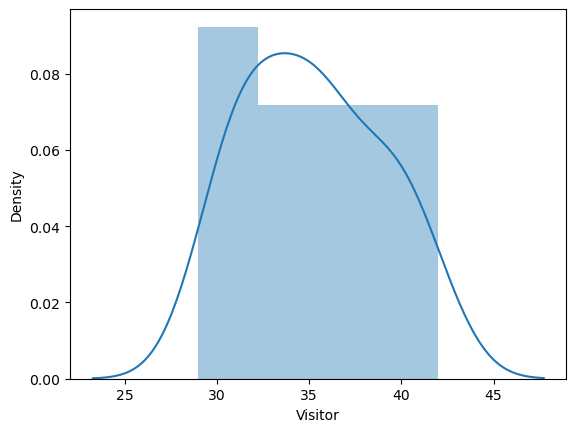

In [8]:
sns.distplot(df['Visitor']);

From the chart above, we can see that the distribution of data ranges from **30 to 40 visitors per day**.

We create a distribution plot to see the distribution of data in the Buyer column

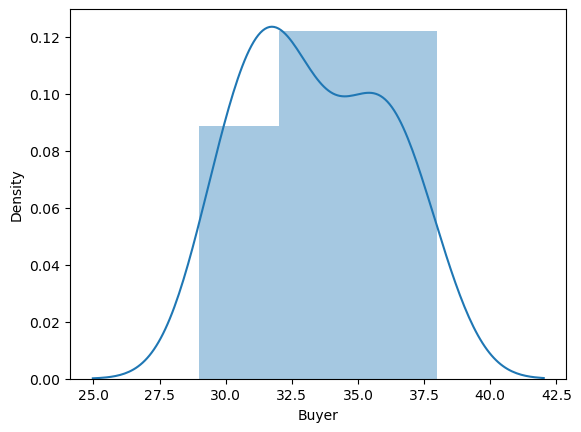

In [9]:
sns.distplot(df['Buyer']);

From the data above, we can see that the number of buyers every day ranges from **30 to 38 people**.

We calculate the mode, mean, and median of data in the Visitor and Buyer column

In [10]:
# mode_visitor = statistics.mode(df['Visitor'])
# mode_buyer = statistics.mode(df['Buyer'])

# print('Mode Visitor : ',mode_visitor)
# print('Mode Buyer : ',mode_buyer)

In [11]:
print('Mode Visitor : ',df['Visitor'].mode()[0])
print('Mean Visitor : ',df['Visitor'].mean())
print('Median Visitor : ',df['Visitor'].median())
print('Mode Buyer : ',statistics.mode(df['Buyer']))
print('Mean Buyer : ',df['Buyer'].mean())
print('Median Buyer : ',df['Buyer'].median())

Mode Visitor :  36
Mean Visitor :  35.2
Median Visitor :  35.0
Mode Buyer :  32
Mean Buyer :  33.4
Median Buyer :  33.0


It is known that the distribution of data from the two columns, Visitor column and Buyer column is not normal distribution

We are labeling visitors based on their behavior

In [12]:
Wandering = df[df['Visitor'] > df['Buyer']].shape[0]
Need_Based = df[df['Visitor'] == df['Buyer']].shape[0]
Loyal = df[df['Visitor'] < df['Buyer']].shape[0]

print('Wandering Customers : ',Wandering)
print('Need-Based Customers : ',Need_Based)
print('Loyal Customers : ',Loyal)

Wandering Customers :  22
Need-Based Customers :  1
Loyal Customers :  7


We are converting the labeling results into dataframe

In [13]:
data = [['Wandering Customers', 22], ['Need-Based Customers', 1], ['Loyal Customers', 7]]

df_type = pd.DataFrame(data, columns=['Type Visitor', 'Numbers Visitor'])
df_type = df_type.sort_values(['Numbers Visitor'], ascending=True)

df_type

,Type Visitor,Numbers Visitor
1,Need-Based Customers,1
2,Loyal Customers,7
0,Wandering Customers,22


We are plotting the results from visitor labeling to see the numbers of visitor based on their category.

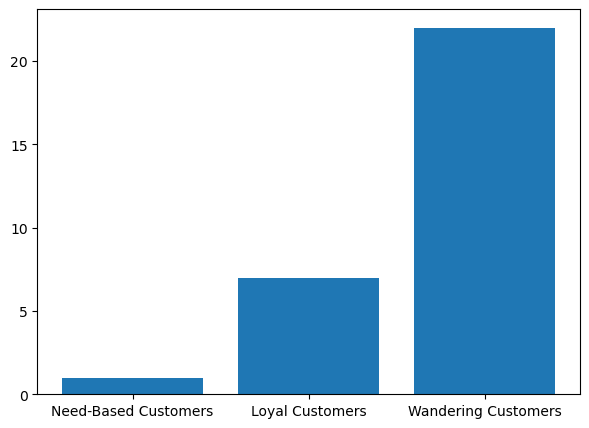

In [14]:
plt.figure(figsize=(7, 5))
plt.bar(df_type['Type Visitor'], df_type['Numbers Visitor'])
plt.show()

Within 30 days all visitors in supermarket can be grouped into 3 categories based on their behavior, it is **Wandering Customers, Loyal Customers and Need Based Customers**.

Wandering Customers are the type of visitors who only look at the products offered. Then there are Loyal Customers are visitors purchase product offered repeatedly. And the last Need-Based Customers are visitors who only buy based on what is their needed.

From the graph above, it is known that in **22 days** there are supermarket visitors **who only look** at the products offered or called Wandering Customers. For **7 days** there are visitors who **buy more than 1 product** offered or called Loyal Customers. And only **1 day** visitors who actually **buy what they need** or called Need-Based Customers.

We create scatter plot to see relation between visitor and buyer

<AxesSubplot:xlabel='Visitor', ylabel='Buyer'>

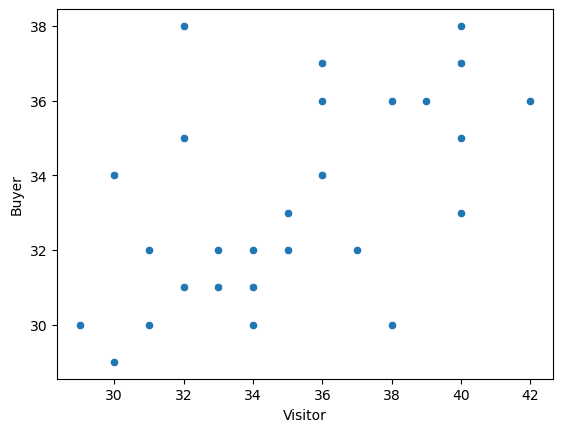

In [15]:
sns.scatterplot(x = df['Visitor'], y=df['Buyer'],data=df)

From the scatter plot above we can see that the relation between visitor and buyer **aren't significantly strong** because they don't make a significant up hill pattern.

We create a heatmap to see the correlation value between buyer and visitor.

<AxesSubplot:>

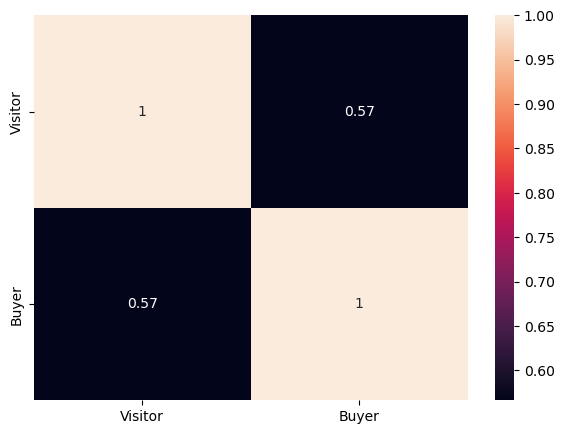

In [16]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True)

From the heatmap we can see the corellation value between buyer and visitor is 0.57, which means buyer and visitor variable have a **moderate correlation**

We are comparing the growth between visitor and buyer with line chart.

<AxesSubplot:>

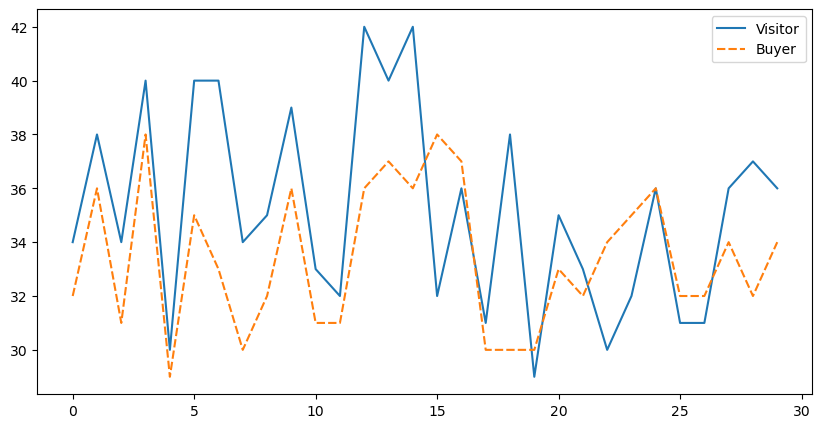

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df)

From the graph it can be seen that the growth of buyers has not changed significantly. But if we see the visitor graph there are in days 12 and 14 the number of visitor reaches the highest number. This probably caused by a event where people just wandering around without make a purchased.

# Preprocessing Model

We determine column Y, using Buyer column

In [18]:
X = df.drop(['Buyer'], axis=1)
y = df['Buyer']

After determine the Y column, we split the dataset to training model and testing model with the proportion of 1/3

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1/3, random_state = 42)

We display total rows to train and test

In [20]:
print('X_train =',X_train.shape)
print('X_test =',X_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

X_train = (10, 1)
X_test = (20, 1)
y_train = (10,)
y_test = (20,)


# Modeling

Modeling Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.

In this case we will chose a linear regression model to predict y variables. After we choose the model we train the model to training dataset

In [21]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

After we train the model, we display the coefficient.

In [22]:
regressor.coef_

array([0.30986888])

After we train and see the coefficient, we will test the model to predict Y variable based on X dataset.

In [23]:
y_pred = regressor.predict(X_test)

Compare predict result with data actual, and then convert to dataframe

In [24]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result.head()

,Actual,Predict
27,34,32.378882
15,38,31.139406
23,35,31.139406
17,30,30.829538
8,32,32.069013


We will plot the result using predicted dataframe, to see the result of the model prediction.

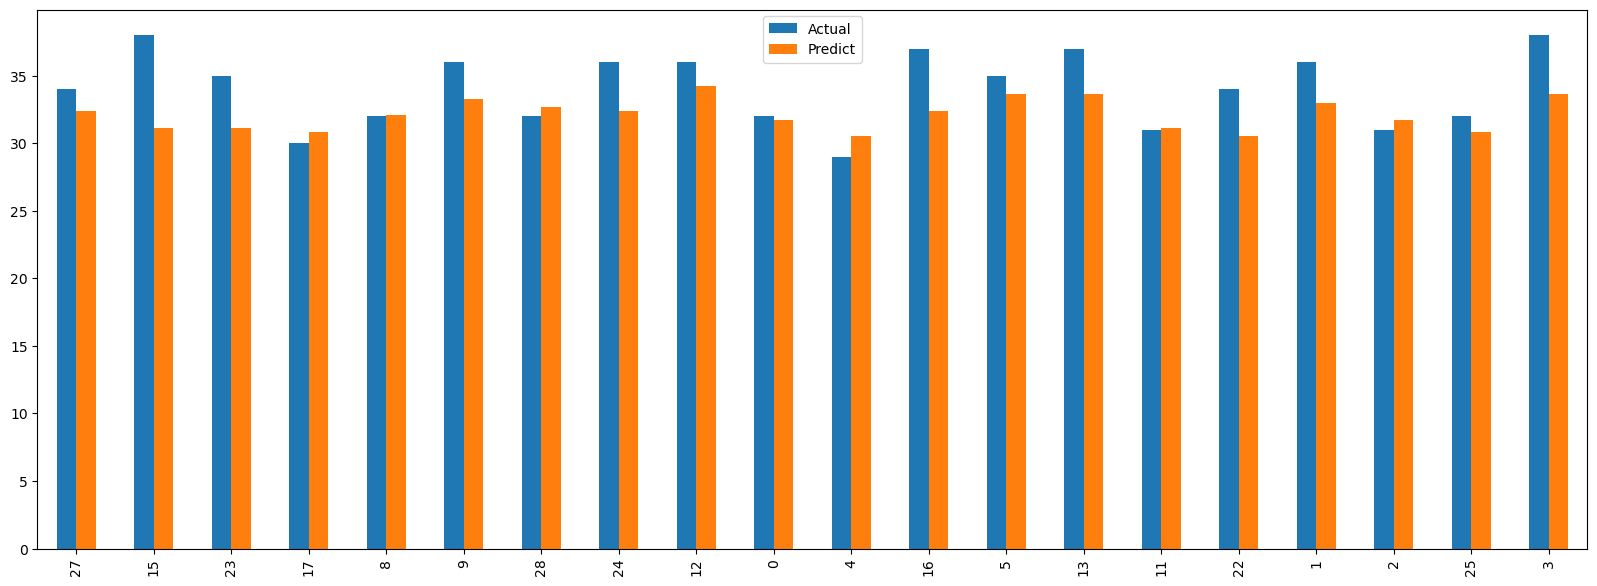

In [25]:
result.plot(kind='bar', figsize=(20, 7))
plt.show()

From the bar chart, most of the model prediction value is under the actual value.

After plotting with bar chart we plot the prediction the actual value with scatter and the predicted value with plot to see how far the difference between predicted value and actual value.

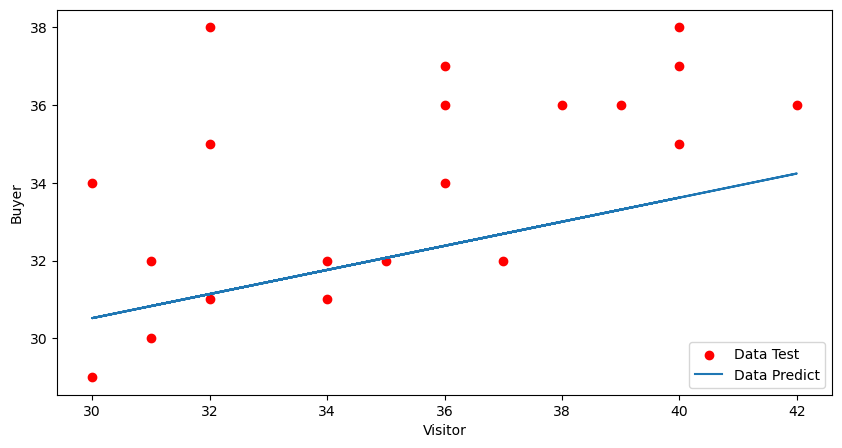

In [26]:
df_ypred = pd.DataFrame(y_pred)
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='r', label='Data Test')
plt.plot(X_test.values, y_pred, label='Data Predict')
plt.xlabel('Visitor')
plt.ylabel('Buyer')
plt.legend(loc='lower right');

From the chart we can see most of the model predicted value is under the actual value. And the increasing number of visitors, the **model prediction less accurately**.

# Evaluate

We evaluate the model we will use RMSE, MAE, MAPE, and R Square to see the model performance

**Root Mean Square Error (RMSE)** is used to determine the magnitude of the prediction error rate. Where the smaller (closer to 0) the RMSE value, the more accurate the prediction results will be <br>
**Mean Absolute Error (MAE)** is used to calculate the magnitude of the difference between predict and result <br>
**Mean Absolute Percentage Error (MAPE)** is used to calculate the percentage of average absolute error <br>
**r2** is coefficient of determination which shows how well the model fits the dependent variable

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mea = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE\t:',rmse,'\nMEA \t:',mea, '\nMAPE \t:',mape, '\nR2 \t:',r2)

RMSE	: 2.9032768988296604 
MEA 	: 2.30407177363699 
MAPE 	: 0.06482235882578176 
R2 	: -0.17929580290702618


Based on the evaluation that has been carried out, the results for the **RMSE is 2.9**, which means that the model does not predict accurately. The value of the difference between predict and result **(MAE) is 2.3**, with a **MAPE is 6%** which means the error value is quite low. And the last, for **R-Square with a value of -0.17** which means that between buyers and visitors, it shows that the two have a weak correlation.

# Deployment

We are started to deploy model using MLflow

In [28]:
# import library
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import warnings
import sys

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

from urllib.parse import urlparse

import mlflow
import mlflow.sklearn

import logging

# evaluation metrics
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mape = mean_absolute_percentage_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, mape, r2


# modeling
with mlflow.start_run():
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    (rmse, mae, mape, r2) = eval_metrics(y_test, y_pred)
    
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  MAPE: %s" % mape)
    print("  R2: %s" % r2)
    
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mape", mape)
    mlflow.log_metric("r2", r2)
    
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(lr, "model", registered_model_name="Linear Regression")
    else:
        mlflow.sklearn.log_model(lr, "model")


  RMSE: 2.9032768988296604
  MAE: 2.30407177363699
  MAPE: 0.06482235882578176
  R2: -0.17929580290702618


# Result

We assumed this dataset contains data visitors and buyer at supermarket within 30 days, the **average visitors** in a supermarket **up to 35 visitors per day**. When the supermarket **not crowded**, there are only about **29 people per day**. But when the **supermarket is crowded**, visitors can reach **up to 42 visitors per day**.
Meanwhile the average of visitors who **make purchases up to 33 visitors**. When supermarket is **crowded, up to 38 people make purchases**. And only **29 visitors** make purchases when supermarket **not crowded**. 

In those 30 days it is known that **94.89% visitors make purchases** in supermarket. Whereas total visitors in supermarket up to 1056 visitors and total visitors make purchases up to 1002 visitors. 

In **22 days** there are supermarket visitors **who only look** at the products offered or called Wandering Customers. For **7 days** there are visitors who **buy more than 1 product** offered or called Loyal Customers. And only **1 day** visitors who actually **buy what they need** or called Need-Based Customers.

Based on the evaluation that has been carried out, the results for the **RMSE is 2.9**, which means that the model does not predict accurately. The value of the difference between predict and result **(MAE) is 2.3**, with a **MAPE is 6%** which means the error value is quite low. And the last, for **R2 with a value of -0.17** which means that between buyers and visitors, it shows that the two have a weak correlation.

# Recommendations

Based on the supermarket visitor categories that have been determined, we suggest the business team to **attract the attention of the Wandering Customers** category by interacting to introduce existing production. This type of visitor will pay close attention to the offer and it is not impossible after an interaction occurs, they decide to buy the product. 

Then for the **Loyal Customers category**, we recommend the business team to **maintain product quality, improve the best service and provide attractive rewards**. Because we assume that Loyal Customers are already engaged with the services or products that have been provided so they are difficult to move to other supermarkets.

And the last for the **Need-Based Customers category**, we recommend the business team to **build interest with visitor that the product matches with they needed**. So that we are expected they will purchase transaction process.

# Result Deployement

**MLflow** Tracking is an API and user interface component that records data about machine learning experiments and lets you query it. MLflow Tracking supports Python, as well as various APIs like REST, Java API, and R API.

You can use this component to log several aspects of your runs. Here are the main components you can record for each of your runs:

- Source : can be the name of the file that launches the run. Alternatively, if you are using an MLflow project, it can be the name of the project and entry point of the run.
- Code version : when using an MLflow Project, this would be the Git commit hash.
- Parameters : can be any key-value input parameters you choose, as long as the values and the keys are both strings.
- Artifacts : are output files (in all formats). Artifacts let you record images, PNGs for example, models (such as pickled scikit-learn models), and data files such as Parquet files.
- Start and end time : lets you record the start and end time of your run.
- Metrics : let you record key-value metrics containing numeric values. It is possible to update each metric throughout the duration of a run. This lets you, for example, track how the loss function of the model is converging. Additionally, MLflow lets you visualize the full history of each metric.

This deployment we use MLflow to track the model and we get some result, the results of the metrix evaluation for **RMSE** the value it is 2.9032768988296604. For **MEA** it is 2.30407177363699 with a **MAPE** of 6%. And for **R2**, the value is -0.17929580290702618.

The results of the evaluation matrix values in this deployment are the same as the evaluation values in the previous stage